In [83]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
import yfinance as yf

In [85]:
PLTR = yf.Ticker("PLTR")

#Get Stock Info
PLTR.info

{'address1': '1200 17th Street',
 'address2': 'Floor 15',
 'city': 'Denver',
 'state': 'CO',
 'zip': '80202',
 'country': 'United States',
 'phone': '720 358 3679',
 'website': 'https://www.palantir.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Palantir Technologies Inc. builds and deploys software platforms for the intelligence community to assist in counterterrorism investigations and operations in the United States, the United Kingdom, and internationally. The company provides Palantir Gotham, a software platform which enables users to identify patterns hidden deep within datasets, ranging from signals intelligence sources to reports from confidential informants, as well as facilitates the handoff between analysts and operational users, helping operators plan and execute real-world respon

In [89]:
#Historical Stock Data
pltr_data = PLTR.history(period="max")
pltr_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-30 00:00:00-04:00,10.00,11.41,9.11,9.50,338584400,0.0,0.0
2020-10-01 00:00:00-04:00,9.69,10.10,9.23,9.46,124297600,0.0,0.0
2020-10-02 00:00:00-04:00,9.06,9.28,8.94,9.20,55018300,0.0,0.0
2020-10-05 00:00:00-04:00,9.43,9.49,8.92,9.03,36316900,0.0,0.0
2020-10-06 00:00:00-04:00,9.04,10.18,8.90,9.90,90864000,0.0,0.0


In [91]:
pltr_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-19 00:00:00-04:00,32.419998,32.590000,31.813999,32.500000,52353600,0.0,0.0
2024-08-20 00:00:00-04:00,32.500000,32.720001,31.629999,32.320000,40783000,0.0,0.0
2024-08-21 00:00:00-04:00,32.320000,32.669998,31.969999,32.540001,38147600,0.0,0.0
2024-08-22 00:00:00-04:00,32.549999,33.125000,31.850000,31.920000,43522200,0.0,0.0
2024-08-23 00:00:00-04:00,31.990000,32.549999,31.622000,31.780001,33999300,0.0,0.0


In [24]:
pltr_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 981 entries, 2020-09-30 00:00:00-04:00 to 2024-08-23 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          981 non-null    float64
 1   High          981 non-null    float64
 2   Low           981 non-null    float64
 3   Close         981 non-null    float64
 4   Volume        981 non-null    int64  
 5   Dividends     981 non-null    float64
 6   Stock Splits  981 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 61.3 KB


In [103]:
# Reset the index to move 'Date' from the index to a column
pltr_data = pltr_data.reset_index()

# Display the first few rows to confirm
print(pltr_data.head())

                       Date   Open   High   Low  Close     Volume  Dividends  \
0 2020-09-30 00:00:00-04:00  10.00  11.41  9.11   9.50  338584400        0.0   
1 2020-10-01 00:00:00-04:00   9.69  10.10  9.23   9.46  124297600        0.0   
2 2020-10-02 00:00:00-04:00   9.06   9.28  8.94   9.20   55018300        0.0   
3 2020-10-05 00:00:00-04:00   9.43   9.49  8.92   9.03   36316900        0.0   
4 2020-10-06 00:00:00-04:00   9.04  10.18  8.90   9.90   90864000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [105]:
# Print the column names to check for discrepancies
print(pltr_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [107]:
# Convert the 'Date' column to datetime and sort the data by date
pltr_data['Date'] = pd.to_datetime(pltr_data['Date'])
pltr_data = pltr_data.sort_values('Date')

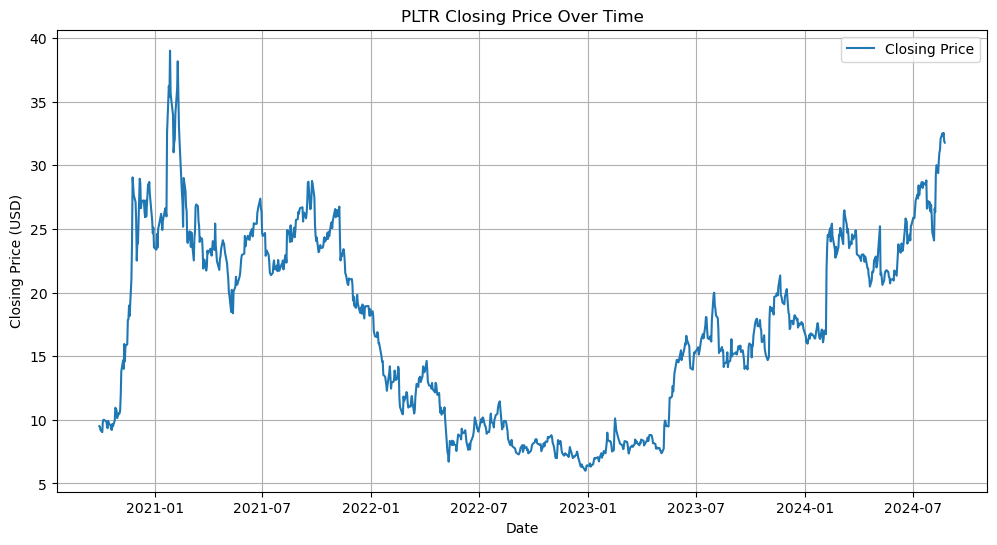

In [32]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(pltr_data['Date'], pltr_data['Close'], label='Closing Price')
plt.title('PLTR Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

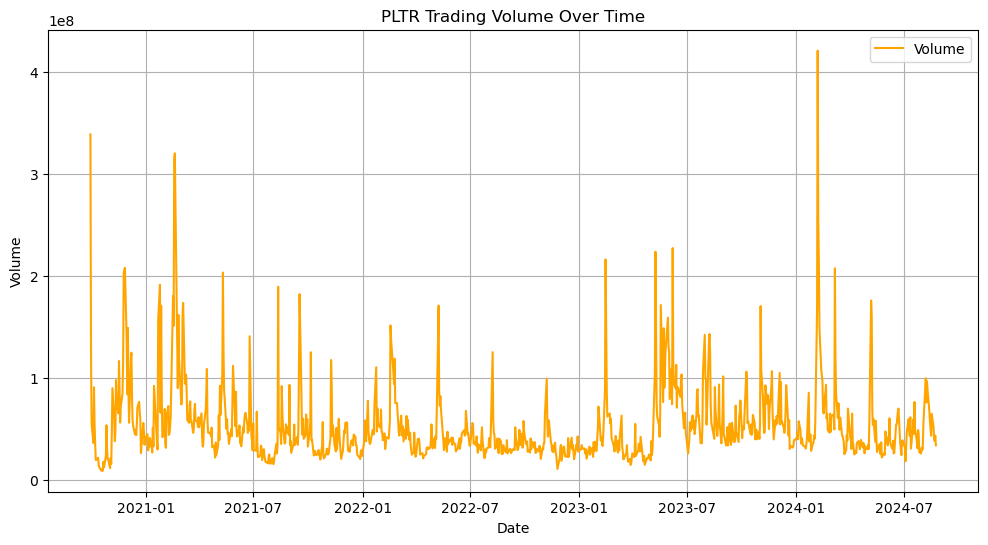

In [34]:
# Plot the volume over time
plt.figure(figsize=(12, 6))
plt.plot(pltr_data['Date'], pltr_data['Volume'], label='Volume', color='orange')
plt.title('PLTR Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


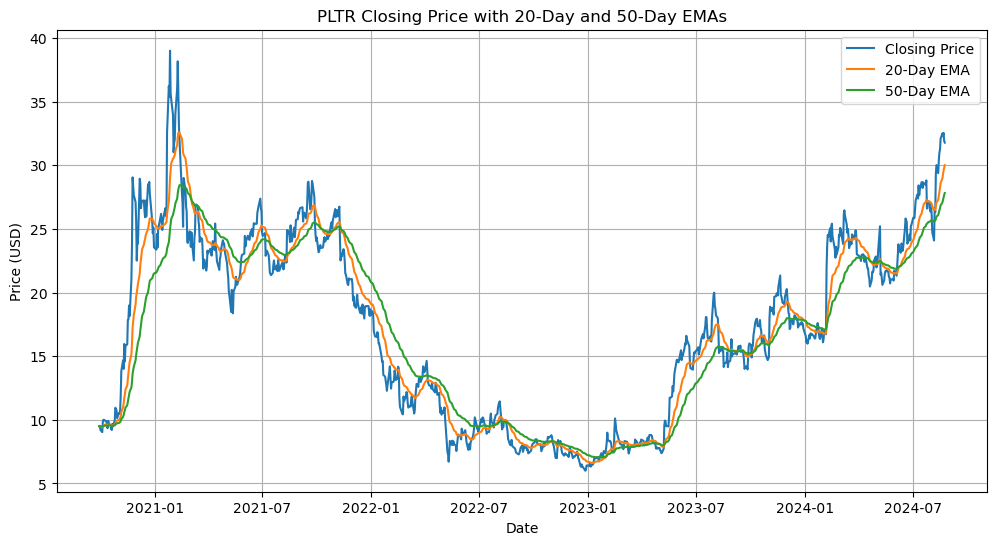

In [36]:
# Calculate and plot Exponential Moving Averages (20-day and 50-day)
pltr_data['EMA20'] = pltr_data['Close'].ewm(span=20, adjust=False).mean()
pltr_data['EMA50'] = pltr_data['Close'].ewm(span=50, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(pltr_data['Date'], pltr_data['Close'], label='Closing Price')
plt.plot(pltr_data['Date'], pltr_data['EMA20'], label='20-Day EMA')
plt.plot(pltr_data['Date'], pltr_data['EMA50'], label='50-Day EMA')
plt.title('PLTR Closing Price with 20-Day and 50-Day EMAs')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Extract the 'Close' prices for modeling
close_prices = pltr_data['Close'].values

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

In [40]:
!pip install pandas numpy matplotlib scikit-learn tensorflow

Epoch 1/10


C:\Users\shaik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


724/724 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0109
Epoch 2/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0033
Epoch 3/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0038
Epoch 4/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0031
Epoch 5/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0025
Epoch 6/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0030
Epoch 7/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0021
Epoch 8/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0022
Epoch 9/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0018
Epoch 10/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0015
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


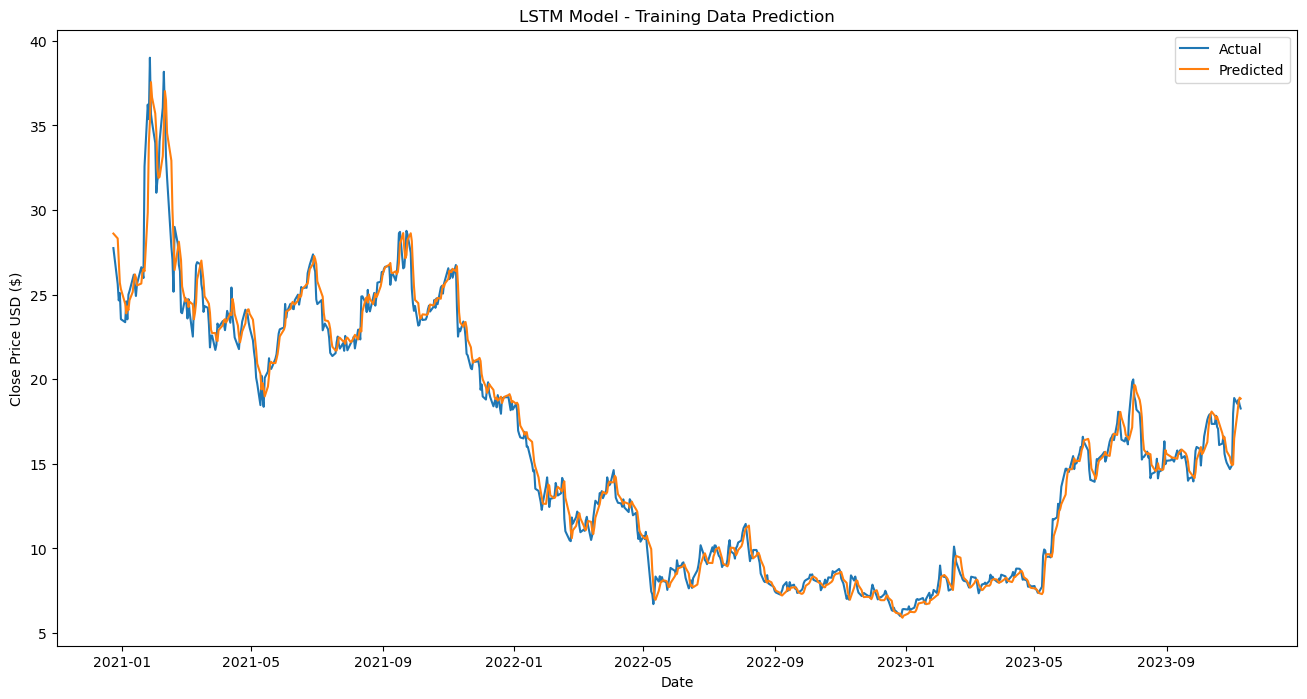

In [42]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Extract the 'Close' prices for modeling
close_prices = pltr_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]

# Prepare the data for LSTM: use 60 days of data to predict the next day
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)

# Reshape the data to be suitable for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Predict on the training set
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)  # Inverse transform to get actual values

# Inverse transform y_train for comparison
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(pltr_data['Date'][:train_size][time_step:], y_train_actual, label='Actual')
plt.plot(pltr_data['Date'][:train_size][time_step:], train_predictions, label='Predicted')
plt.title('LSTM Model - Training Data Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

Epoch 1/10


C:\Users\shaik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


774/774 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0156
Epoch 2/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0041
Epoch 3/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0034
Epoch 4/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0036
Epoch 5/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0020
Epoch 6/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0029
Epoch 7/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0022
Epoch 8/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0025
Epoch 9/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0028
Epoch 10/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0020
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


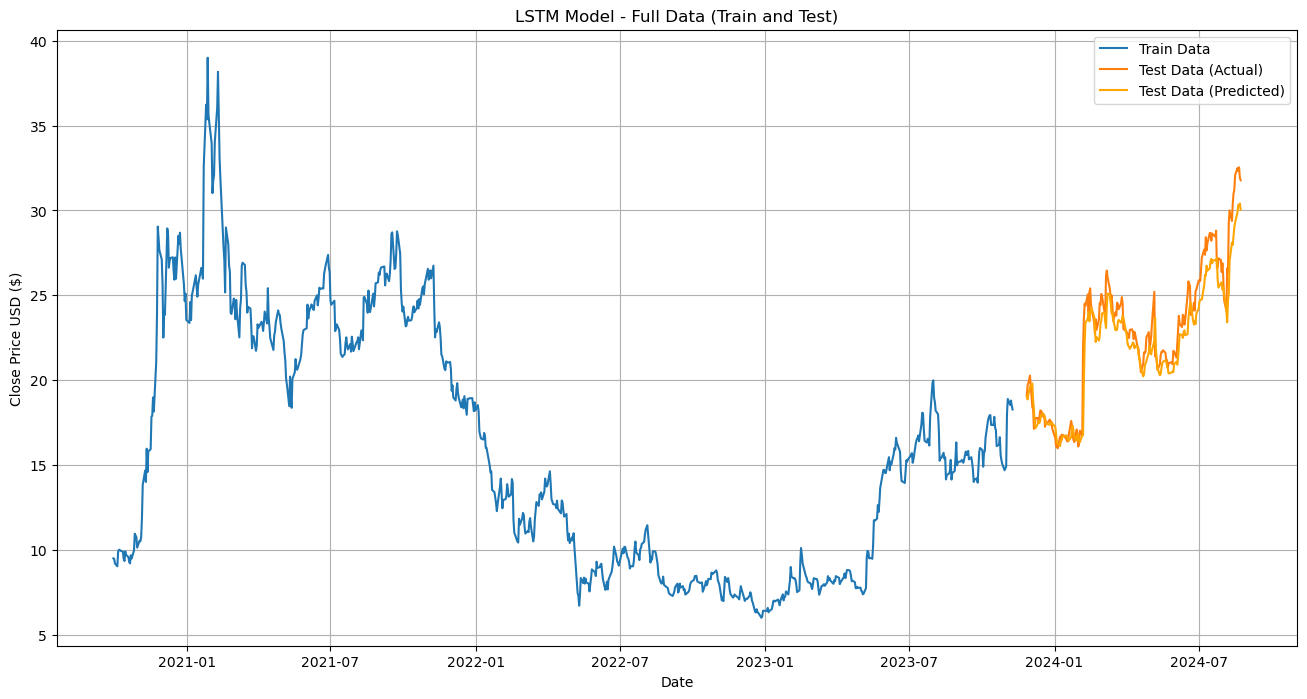

In [109]:
# Extract the 'Close' prices for modeling
close_prices = pltr_data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the data for LSTM: use 10 days of data to predict the next day
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data to be suitable for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Predict on the test set
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)  # Inverse transform to get actual values

# Inverse transform y_test for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a plot for the entire dataset
plt.figure(figsize=(16, 8))

# Plot the training data
plt.plot(pltr_data['Date'][:train_size], scaler.inverse_transform(train_data), label='Train Data')

# Plot the actual prices in the test set
plt.plot(pltr_data['Date'][train_size + time_step:], y_test_actual, label='Test Data (Actual)')

# Plot the predicted prices in the test set
plt.plot(pltr_data['Date'][train_size + time_step:], test_predictions, label='Test Data (Predicted)', color='orange')

# Add labels and title
plt.title('LSTM Model - Full Data (Train and Test)')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
valid

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA20,EMA50,Predictions
874,2024-03-22 00:00:00-04:00,24.200001,24.475000,24.020000,24.180000,25354300,0.0,0.0,24.190167,22.479247,24.836050
875,2024-03-25 00:00:00-04:00,24.120001,24.620001,24.049999,24.510000,29255900,0.0,0.0,24.220627,22.558884,24.795198
876,2024-03-26 00:00:00-04:00,24.760000,25.469999,24.469999,24.889999,43610500,0.0,0.0,24.284377,22.650301,24.886940
877,2024-03-27 00:00:00-04:00,25.000000,25.480000,24.260000,24.510000,38600100,0.0,0.0,24.305865,22.723230,25.137735
878,2024-03-28 00:00:00-04:00,24.170000,24.280001,22.940001,23.010000,70008200,0.0,0.0,24.182449,22.734476,25.122967
...,...,...,...,...,...,...,...,...,...,...,...
976,2024-08-19 00:00:00-04:00,32.419998,32.590000,31.813999,32.500000,52353600,0.0,0.0,28.962380,27.069095,32.547958
977,2024-08-20 00:00:00-04:00,32.500000,32.720001,31.629999,32.320000,40783000,0.0,0.0,29.282153,27.275013,33.120525
978,2024-08-21 00:00:00-04:00,32.320000,32.669998,31.969999,32.540001,38147600,0.0,0.0,29.592425,27.481483,33.336494
979,2024-08-22 00:00:00-04:00,32.549999,33.125000,31.850000,31.920000,43522200,0.0,0.0,29.814098,27.655542,33.513432
